In [1]:
#importing all necessary packages, libraries and frameworks.
import numpy as np
import types
import pandas as pd
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
from botocore.client import Config
import ibm_boto3

In [2]:

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ca8b4c1c6be2472b955e8983984f462d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1l85oUhvIuM0S92To0wdHCK0-rV3QeYYio_pAavVHF0P',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ca8b4c1c6be2472b955e8983984f462d.get_object(Bucket='heartdiseasepredictor-donotdelete-pr-5aiq3vpa4djezf',Key='Final.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

initial_data = pd.read_csv(body)
initial_data.head()


,Age,Sex,Chest Pain Type,Blood Pressure,Cholestrol,Blood Sugar,Electrocardiac Measurement at Rest,Maximum Heart Rate,Exercise indused Angina,ST Depression Induced,Slope of Peak Exercise ST Segment,Number of Major Vessels,Thalassemia,Prediction
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5, 1.0, 'BoxPlot plotted between Age & Predictions')

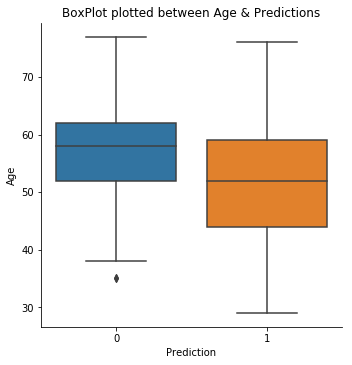

In [3]:
#visualization
sns.catplot(x="Prediction", y="Age", kind="box", data=initial_data)
plt.title("BoxPlot plotted between Age & Predictions")

Text(0.5, 1.0, 'BoxPlot plotted between Blood Pressure & Predictions')

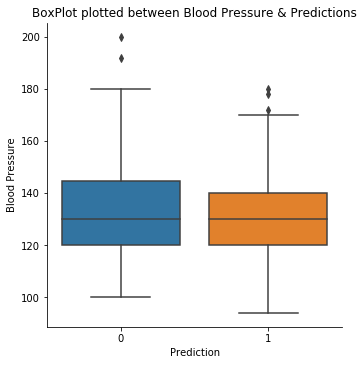

In [4]:
#visualization
sns.catplot(x="Prediction", y="Blood Pressure", kind="box", data=initial_data)
plt.title("BoxPlot plotted between Blood Pressure & Predictions")

Text(0.5, 1.0, 'BoxPlot plotted between Chholestrol & Predictions')

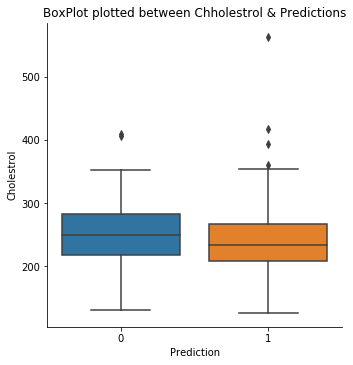

In [5]:
#visualization
sns.catplot(x="Prediction", y="Cholestrol", kind="box", data=initial_data)
plt.title("BoxPlot plotted between Chholestrol & Predictions")

Text(0.5, 1.0, 'BoxPlot plotted between Maximum Heart Rate & Predictions')

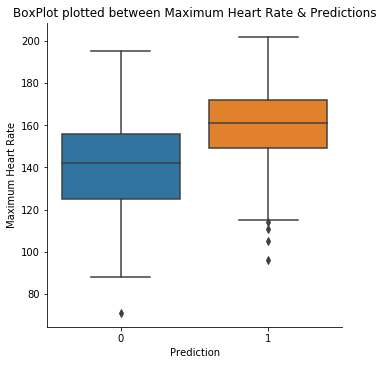

In [6]:
#visualization
sns.catplot(x="Prediction",y="Maximum Heart Rate", kind="box", data=initial_data)
plt.title("BoxPlot plotted between Maximum Heart Rate & Predictions")

Text(0.5, 1.0, 'BoxPlot plotted between ST Depression Induced & Predictions')

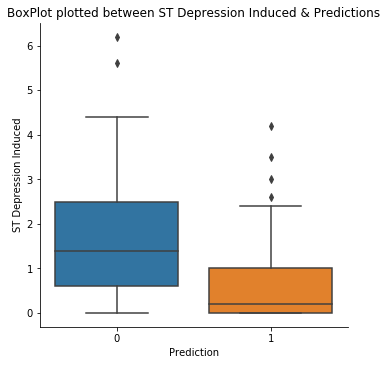

In [7]:
#visualization
sns.catplot(x="Prediction",y="ST Depression Induced", kind="box", data=initial_data)
plt.title("BoxPlot plotted between ST Depression Induced & Predictions")

In [8]:
#creating a new dataframe excluding the target variable.
independent_data = initial_data[['Age','Sex','Chest Pain Type','Blood Pressure','Cholestrol','Blood Sugar',
                                'Electrocardiac Measurement at Rest','Maximum Heart Rate','Exercise indused Angina',
                                 'ST Depression Induced','Slope of Peak Exercise ST Segment','Number of Major Vessels',
                                'Thalassemia']]

In [9]:
#a new data frame having only the target variable.
dependent_data = initial_data[['Prediction']]

In [10]:
#verifying independent_data dataframe.
independent_data.head(2)

,Age,Sex,Chest Pain Type,Blood Pressure,Cholestrol,Blood Sugar,Electrocardiac Measurement at Rest,Maximum Heart Rate,Exercise indused Angina,ST Depression Induced,Slope of Peak Exercise ST Segment,Number of Major Vessels,Thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [11]:
#verifying dependent_data dataframe.
dependent_data.head(2)

,Prediction
0,1
1,1


In [12]:
#Checking the values present in the target variable,
#1-Probable of suffering from a heart disease,
#0-Not a probable.
#So, the data set consists of 165 entries of people suffering from a heart diesease,
#And 138 entries of people not suffering from the same.
dependent_data['Prediction'].value_counts()

1    165
0    138
Name: Prediction, dtype: int64

In [13]:
#converting the dataframe to numpy array to use the scikit learn library.
independent_data_holder = independent_data[['Age','Sex','Chest Pain Type','Blood Pressure','Cholestrol','Blood Sugar',
                                'Electrocardiac Measurement at Rest','Maximum Heart Rate','Exercise indused Angina',
                                 'ST Depression Induced','Slope of Peak Exercise ST Segment','Number of Major Vessels',
                                'Thalassemia']].values

In [14]:
#converting the dataframe to numpy array to use the scikit learn library
dependent_data_holder = dependent_data['Prediction'].values

In [15]:
#preproceesing the data.
independent_data_holder = preprocessing.StandardScaler().fit(independent_data_holder).transform(independent_data_holder.astype(float))

In [16]:
#splitting data into training and testing sets.
ind_train, ind_test, dep_train, dep_test = train_test_split(independent_data_holder,dependent_data_holder, test_size=0.2, 
                                                           random_state=4)
print("Train dataset: ",ind_train.shape,dep_train.shape)
print("Test dataset: ",ind_test.shape,dep_test.shape)

Train dataset:  (242, 13) (242,)
Test dataset:  (61, 13) (61,)


In [17]:
#selecting the best accurate k in the k-nearest neighbors.
ks = 15
mean = np.zeros((ks-1))
std = np.zeros((ks-1))
for n in range (1,ks):
    x = KNeighborsClassifier(n_neighbors = n,).fit(ind_train,dep_train.ravel())
    y = x.predict(ind_test)
    mean[n-1] = metrics.accuracy_score(dep_test, y)
    std[n-1] = np.std(y==dep_test)/np.sqrt(y.shape[0])
print( "The best accuracy was with: ", mean.max(), "with k =", mean.argmax()+1) 

The best accuracy was with:  0.8524590163934426 with k = 10


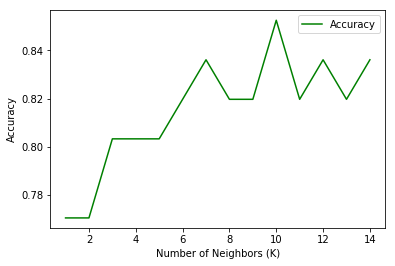

In [18]:
#plotting the accuracy for all k's chosen previously.
plt.plot(range(1,ks),mean,'g')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.legend(("Accuracy",))
plt.show()


In [19]:
#so 10 being the best K, k is initialized to 10.
#training the model now,
final_k = 10
my_model = KNeighborsClassifier(n_neighbors = final_k).fit(ind_train,dep_train.ravel())

In [20]:
#predicting using the model built
predictions = my_model.predict(ind_test)

In [21]:
#calculating accuracy again using final_k = 10
print("Model's Jaccard Accuracy: ", metrics.accuracy_score(dep_test, predictions))
print("Model's F1-Score Accuracy: ", f1_score(dep_test,predictions, average='weighted'))

Model's Jaccard Accuracy:  0.8524590163934426
Model's F1-Score Accuracy:  0.853660164156861


In [22]:
#done
print("Code File")

Code File
